In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from matplotlib import pyplot as plt


In [19]:
df = pd.read_csv("Battery_RUL.csv")

MIN-MAX SCALING AND FEATUTRE EXTRACTION

In [20]:
scaler = MinMaxScaler()
columns_to_scale = df.columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
selector = SelectKBest(mutual_info_regression, k=5)
selected_features = selector.fit(df[columns_to_scale], df['RUL']).get_support()
selected_indices = np.array(selected_features)
new_df = df[columns_to_scale[selected_indices]]
new_df_i=list(new_df)
print(new_df_i)



['Cycle_Index', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'RUL']


In [21]:
sequence_length = 100
sequences = []
labels = []
for i in range(len(new_df) - sequence_length):
    seq = new_df.iloc[i:i+sequence_length].values
    label = new_df.iloc[i+sequence_length]['RUL']
    sequences.append(seq)
    labels.append(label)

X = np.array(sequences)
y = np.array(labels)

TRAIN-TEST SPLITTING

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL FITTING

In [23]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length,5)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=[RootMeanSquaredError()])
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)



Epoch 1/25

337/337 [==============================] - 21s 54ms/step - loss: 0.0074 - root_mean_squared_error: 0.0860 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0399
Epoch 2/25
337/337 [==============================] - 18s 53ms/step - loss: 8.5825e-04 - root_mean_squared_error: 0.0293 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 3/25
337/337 [==============================] - 18s 53ms/step - loss: 6.6401e-04 - root_mean_squared_error: 0.0258 - val_loss: 9.3902e-04 - val_root_mean_squared_error: 0.0306
Epoch 4/25
337/337 [==============================] - 18s 53ms/step - loss: 5.4478e-04 - root_mean_squared_error: 0.0233 - val_loss: 8.2687e-04 - val_root_mean_squared_error: 0.0288
Epoch 5/25
337/337 [==============================] - 18s 53ms/step - loss: 3.8525e-04 - root_mean_squared_error: 0.0196 - val_loss: 4.4270e-04 - val_root_mean_squared_error: 0.0210
Epoch 6/25
337/337 [==============================] - 18s 53ms/step - loss: 3.1355e-04 - root_mean_s

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            1024      
                                                                 
 lstm (LSTM)                 (None, 50)                23000     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 24075 (94.04 KB)
Trainable params: 24075 (94.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


PLOTS OF DIFFERENT LOSS FUNCTIONS VS EPOCHS

94/94 [==============================] - 1s 10ms/step - loss: 1.4568e-05 - root_mean_squared_error: 0.0038
Test Loss: [1.456757036066847e-05, 0.0038167487364262342]
94/94 [==============================] - 1s 11ms/step
[[0.5811225]
 [0.8305543]
 [0.5837201]
 [0.4602476]
 [0.7613498]]
[0.58252427 0.83230362 0.58517211 0.46425419 0.76345984]


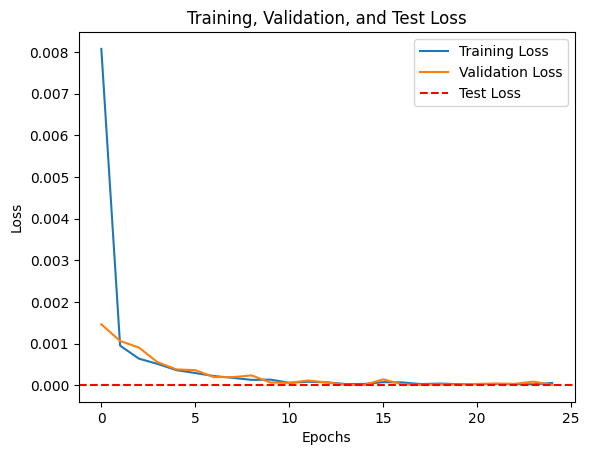

In [7]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
predictions = model.predict(X_test)
print(predictions[:5])
print(y_test[:5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=loss[0], color='r', linestyle='--', label='Test Loss')  # Add a line for test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#predictions_inv = scaler.inverse_transform(predictions)
# pred=predictions.flatten()
# org_pred=[]
# min_pred=pred[pred.argmin()]
# max_pred=pred[pred.argmax()]
# for i in range(len(pred)):
#     val=(pred[i]+min_pred)*(max_pred-min_pred)
#     org_pred.append(val)

PLOT OF PREDICTION VS TRUE LABELS

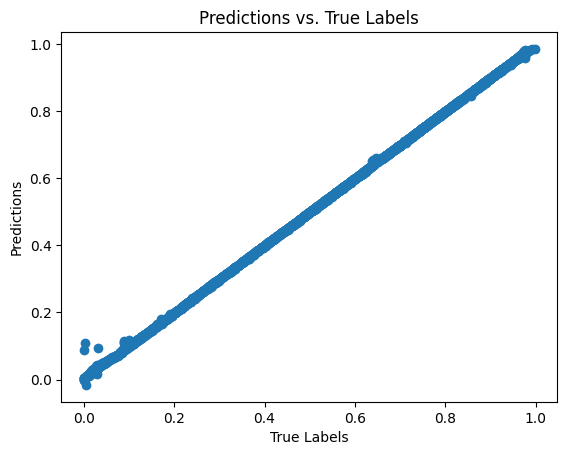

In [8]:
plt.scatter(y_test, predictions)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Labels')
plt.show()

FOR K=3 :TAKING 3 FEATURES

In [10]:
scaler = MinMaxScaler()
columns_to_scale = df.columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
selector = SelectKBest(mutual_info_regression, k=4)
selected_features = selector.fit(df[columns_to_scale], df['RUL']).get_support()
selected_indices = np.array(selected_features)
new_df = df[columns_to_scale[selected_indices]]
sequence_length = 100
sequences = []
labels = []
for i in range(len(new_df) - sequence_length):
    seq = new_df.iloc[i:i+sequence_length].values
    label = new_df.iloc[i+sequence_length]['RUL']
    sequences.append(seq)
    labels.append(label)
X = np.array(sequences)
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length,4)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=[RootMeanSquaredError()])
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
337/337 [==============================] - 11s 30ms/step - loss: 0.0059 - root_mean_squared_error: 0.0769 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0402
Epoch 2/25
337/337 [==============================] - 10s 29ms/step - loss: 9.3078e-04 - root_mean_squared_error: 0.0305 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 3/25
337/337 [==============================] - 10s 29ms/step - loss: 7.6875e-04 - root_mean_squared_error: 0.0277 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 4/25
337/337 [==============================] - 10s 29ms/step - loss: 6.2337e-04 - root_mean_squared_error: 0.0250 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 5/25
337/337 [==============================] - 10s 29ms/step - loss: 5.3036e-04 - root_mean_squared_error: 0.0230 - val_loss: 7.5110e-04 - val_root_mean_squared_error: 0.0274
Epoch 6/25
337/337 [==============================] - 10s 29ms/step - loss: 4.3258e-04 - root_mean_squared_err

94/94 [==============================] - 1s 11ms/step - loss: 7.9528e-05 - root_mean_squared_error: 0.0089
Test Loss: [7.952801388455555e-05, 0.008917847648262978]
94/94 [==============================] - 1s 11ms/step
[[0.579555  ]
 [0.8269049 ]
 [0.58226484]
 [0.45887598]
 [0.75898784]]
[0.58252427 0.83230362 0.58517211 0.46425419 0.76345984]


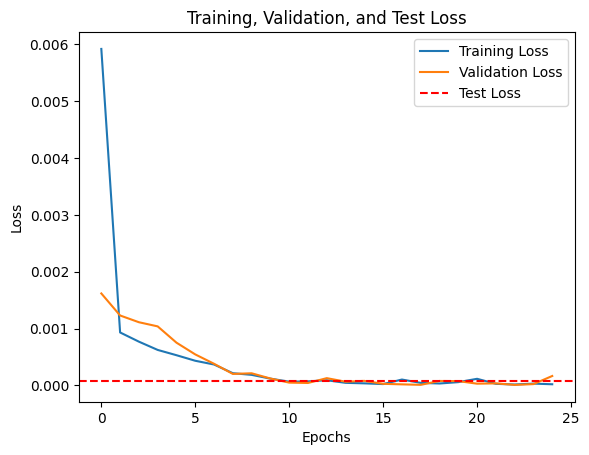

In [13]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
predictions = model.predict(X_test)
print(predictions[:5])
print(y_test[:5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=loss[0], color='r', linestyle='--', label='Test Loss')  # Add a line for test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


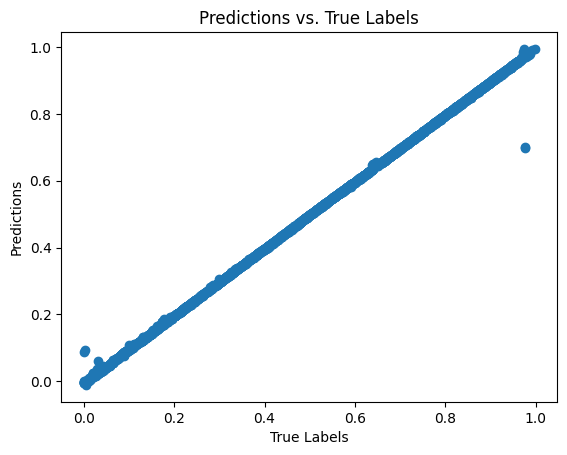

In [12]:
plt.scatter(y_test, predictions)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Labels')
plt.show()

USING K=5:5 FEATURES

In [14]:
scaler = MinMaxScaler()
columns_to_scale = df.columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
selector = SelectKBest(mutual_info_regression, k=6)
selected_features = selector.fit(df[columns_to_scale], df['RUL']).get_support()
selected_indices = np.array(selected_features)
new_df = df[columns_to_scale[selected_indices]]
sequence_length = 100
sequences = []
labels = []
for i in range(len(new_df) - sequence_length):
    seq = new_df.iloc[i:i+sequence_length].values
    label = new_df.iloc[i+sequence_length]['RUL']
    sequences.append(seq)
    labels.append(label)
X = np.array(sequences)
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length,6)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=[RootMeanSquaredError()])
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
337/337 [==============================] - 11s 29ms/step - loss: 0.0074 - root_mean_squared_error: 0.0858 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 2/25
337/337 [==============================] - 10s 29ms/step - loss: 5.4986e-04 - root_mean_squared_error: 0.0234 - val_loss: 5.4173e-04 - val_root_mean_squared_error: 0.0233
Epoch 3/25
337/337 [==============================] - 10s 29ms/step - loss: 4.2879e-04 - root_mean_squared_error: 0.0207 - val_loss: 2.2305e-04 - val_root_mean_squared_error: 0.0149
Epoch 4/25
337/337 [==============================] - 10s 29ms/step - loss: 2.2093e-04 - root_mean_squared_error: 0.0149 - val_loss: 1.4239e-04 - val_root_mean_squared_error: 0.0119
Epoch 5/25
337/337 [==============================] - 10s 29ms/step - loss: 1.3498e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.7673e-04 - val_root_mean_squared_error: 0.0133
Epoch 6/25
337/337 [==============================] - 10s 29ms/step - loss: 1.3014e-04 - root_mean

94/94 [==============================] - 1s 11ms/step - loss: 3.6656e-05 - root_mean_squared_error: 0.0061
Test Loss: [3.665623808046803e-05, 0.006054439581930637]
94/94 [==============================] - 1s 11ms/step
[[0.58317816]
 [0.8350631 ]
 [0.5855281 ]
 [0.46193057]
 [0.7649209 ]]
[0.58252427 0.83230362 0.58517211 0.46425419 0.76345984]


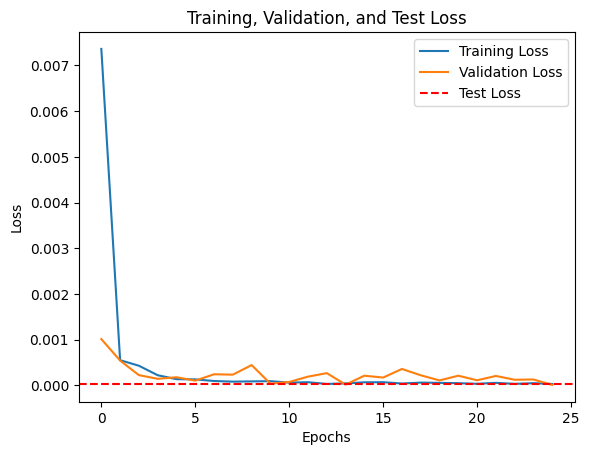

In [15]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
predictions = model.predict(X_test)
print(predictions[:5])
print(y_test[:5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=loss[0], color='r', linestyle='--', label='Test Loss')  # Add a line for test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


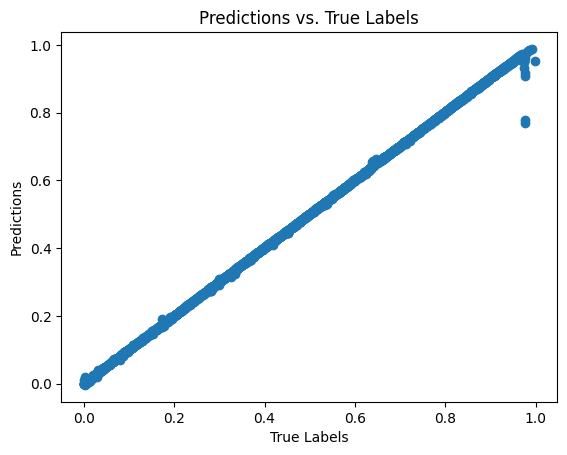

In [16]:
plt.scatter(y_test, predictions)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Labels')
plt.show()